<a href="https://colab.research.google.com/github/kartikeyaGUPTA45/KAPUR-S-ENTROPY/blob/master/KAPUR_ENTROPY_FOR_THREE_THRESHOLD_VALUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KAPUR'S ENTROPY FOR FOUR THRESHOLD VALUES

# IMPORTING THE LIBRARIES

In [0]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# READ AN IMAGE AND CONVERT IT INTO GREYSCALE

In [2]:
image = Image.open('lena.tiff').convert("L")
print(image)

<PIL.Image.Image image mode=L size=512x512 at 0x7FAF20B3EB70>


# DEFINE THE THRESHOLD VALUES

In [0]:
thresholds=[81,127,171]
thresholds.append(255)
thresholds.insert(0,0)

# CONVERT IMAGE INTO ARRAY

In [4]:
img = np.asarray(image)#Convert given input into array
print(img)

[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


# MAKING HISTOGRAM

In [0]:
def Hist(img):
    row, col = img.shape 
    y = np.zeros(256,dtype=float)
    for i in range(0,row):
        for j in range(0,col):
             y[img[i,j]] += 1
    x = np.arange(0,256)
    plt.bar(x, y, color='b', width=5, align='edge', alpha=0.25)
    plt.show()
    return y

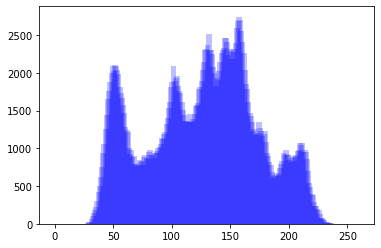

In [6]:
h=Hist(img)

# COUNTING THE PIXELS

In [7]:
cnt = 0
for i in range(0, len(h)):
    if h[i]>0:
           cnt += h[i]
            
print(cnt)

262144.0


# FINDING PROBABILITIES OF AN INDIVIDUAL PIXELS

In [0]:
prob=[]
for i in range (len(h)):
    h[i]=h[i]/cnt
    prob.append(h[i])

# KAPUR'S ENTROPY CALCULATION

In [0]:
w0=prob[:]

In [10]:
SUM=[]
for i in range(len(thresholds)-1):
    SUM.append(sum(h[thresholds[i]:thresholds[i+1]]))
    
print(SUM)

[0.21771240234375, 0.2624244689941406, 0.3529205322265625, 0.16694259643554688]


In [11]:
print(w0[81])
print(w0[127])
print(w0[171])

0.00347900390625
0.008846282958984375
0.004608154296875


In [0]:

for i in range(0,w0.index(0.00347900390625)):
    w0[i]=w0[i]/SUM[0]
for i in range(w0.index(0.00347900390625),w0.index(0.008846282958984375)):
    w0[i]=w0[i]/SUM[1]
for i in range(w0.index(0.008846282958984375),w0.index(0.004608154296875)):
    w0[i]=w0[i]/SUM[2]
for i in range(w0.index(0.004608154296875),256):
    w0[i]=w0[i]/SUM[3]

In [13]:
print(w0)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7521726941407345e-05, 0.00012265208858985141, 0.0003329128118867396, 0.0005081300813008131, 0.0010337818895430333, 0.0016996075133165125, 0.002400476590972806, 0.003188954303336137, 0.0038723016540510233, 0.005238996355480796, 0.007394168769273899, 0.008743341743762265, 0.01075834034202411, 0.013281469021586768, 0.016540510232688533, 0.018573030557891786, 0.021989767311466218, 0.025248808522567983, 0.028875805999439303, 0.03083823941687693, 0.033010933557611435, 0.03500841042893187, 0.03662040930754135, 0.03544645360246706, 0.036813148303896835, 0.036585365853658534, 0.03556910569105691, 0.03465797589010373, 0.03167928231006448, 0.030312587608634707, 0.029226240538267452, 0.027631763386599385, 0.02573941687692739, 0.022392767031118588, 0.021656854499579478, 0.02137650686851696, 0.017574292122231567, 0.01629520605550883, 0.01708368376787216, 0.01541911970843846

In [0]:
w1=prob[:]

In [0]:
for i in range(0,w1.index(0.00347900390625)):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[0])
for i in range(w1.index(0.00347900390625),w1.index(0.008846282958984375)):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[1])
for i in range(w1.index(0.008846282958984375),w1.index(0.004608154296875)):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[2])

    
for i in range(w1.index(0.004608154296875),256):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[3])



In [16]:
print(w1)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -10.952068907598672, -9.006158758543359, -8.007629928432232, -7.584773077612199, -6.8745314636929535, -6.3773579290952895, -6.032087981770548, -5.748062220521877, -5.55390620608092, -5.251625334207986, -4.907063593562661, -4.7394628118471545, -4.53207397945153, -4.321385521956301, -4.101942741453172, -3.98604472049256, -3.8171780560327884, -3.6789763115991505, -3.544751197129256, -3.478999819566475, -3.4109164524623643, -3.352166948390174, -3.307149562639816, -3.3397320704309275, -3.3019002067536722, -3.3081069585961433, -3.3362778355628397, -3.3622273954160153, -3.452092366646551, -3.496192220106848, -3.5326883246799805, -3.5887893206356343, -3.6597317314247957, -3.799017272661193, -3.8324332695810366, -3.8454627698713706, -4.041318119636737, -4.116884321451371, -4.069631436600826, -4.1721470001264205, -4.157482326722174, -4.2813025867527985, -4.269960310148864

In [17]:
mul=[]
for i in range(len(w0)):
    mul.append(w0[i]*w1[i])
    
print(mul)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00019189916084242137, -0.0011046241819071263, -0.0026658425960227857, -0.0038540513605753047, -0.007106766126259536, -0.010839005451398988, -0.014479885994928601, -0.01833030775397711, -0.02150640018825139, -0.02751324598626626, -0.03628365637236198, -0.04143874304583211, -0.04875759432617115, -0.05739434794019617, -0.06784822588890864, -0.07403293039883153, -0.08393885723859597, -0.09288976845063035, -0.10235754788458462, -0.1072862293670626, -0.11259753638279882, -0.1173540363555433, -0.12110917062512642, -0.11838165787920112, -0.12155334199589056, -0.12102830336327353, -0.11866841894786523, -0.11652799600737451, -0.1093598086434147, -0.10597863296861591, -0.10324719872382618, -0.0991645773521586, -0.09419936069286208, -0.08507050873389761, -0.08299844969866417, -0.0822025613127816, -0.0710233051933636, -0.06708547832474374, -0.0695242965146798, -0.06433083

In [18]:
kapur_entropy=[]
for i in range(len(thresholds)-1):
    kapur_entropy.append(-(sum(mul[thresholds[i]:thresholds[i+1]])))
    
print(kapur_entropy)

[3.8061463732740317, 3.79882068853208, 3.762134039646771, 3.940570354969153]


# RESULTS

In [19]:
J=sum(kapur_entropy)
print(J)

15.307671456422035
